# Cairo lattice ACI

    In this notebook, I will perform the first steps of the simulations of a Cairo lattice. I will start by applying a magnetic field ramp and save the trajectories in order to analyze (In other notebook) the vertex fraction versus the interparticle interaction. This way, we will be able to conclude if the lattice is degenerate or not. 

In [1]:
import os
import sys
import numpy as np
from importlib import reload  
import support as sup
reload(sup)
sys.path.insert(0, '../icenumerics')

import icenumerics as ice

from icenumerics.geometry import ordering 
import magcolloids as mgc

import matplotlib.pyplot as plt
ureg = ice.ureg
from string import Template

%load_ext autoreload
%autoreload 2

In [2]:
output = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-1.0"

    I'm using this lattice contant parameter because is the same as the experimental microstructures. The same occur with the two type trap_sep parameter. 
    
    lattice_constant=19.5458*ureg.um
    lattice_constant=21.3759*ureg.um
    lattice_constant=23.2919*ureg.um

In [3]:
np.random.seed()

l = 4

sp = sup.spins()
ureg = ice.ureg
sp.create_lattice(geometry = "cairo",size =[l,l],lattice_constant=19.5458*ureg.um, border="closed spin")
sp.order_spins(ordering.random_ordering)

/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:62: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,0] = centers_toAddX
/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:63: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new[:,1] = centers_toAddY
/home/carolina/CairoLattice_ACI_PROJECT/Scripts/support.py:283: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  new_centers[:,1] = centersY


In [4]:
particle = ice.particle(radius = 5*ureg.um,
             susceptibility = 0.005,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap_long = ice.trap(trap_sep = 10*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

trap_short = ice.trap(trap_sep = 4.5258*ureg.um,
               height = 30*ureg.pN*ureg.nm,
               stiffness = 0.1*ureg.fN/ureg.nm)

traps = []

    In this Kenrel I will define which traps have to be shorter

In [5]:
for s in sp:
    
    if ( s.direction[0].magnitude == 1.0 or s.direction[0].magnitude == -1.0 or 
        s.direction[1].magnitude == 1.0 or s.direction[1].magnitude == -1.0 ):
        
        traps.append(trap_short)
        
    else:
        
        traps.append(trap_long)

In [6]:
col = ice.colloidal_ice(sp, particle, traps, height_spread = 0, susceptibility_spread = 0.1)

col.pad_region(5*ureg.um) # Why is this important?? Whitout this line the simulation do not run.  

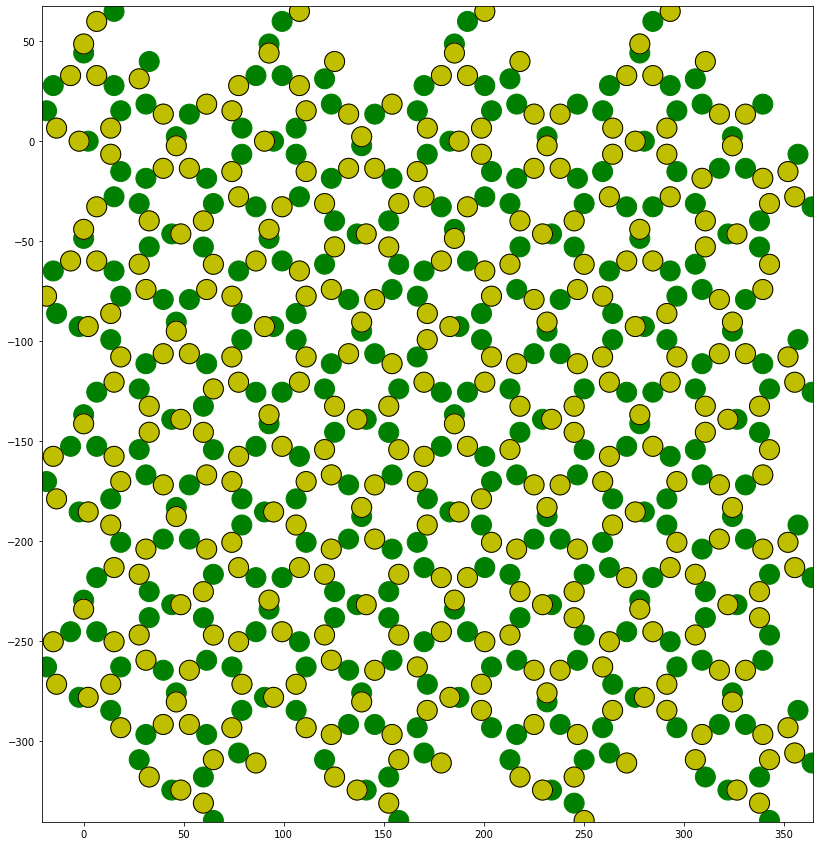

In [7]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
col.display(ax1)

In [8]:
world = ice.world(
    field = 25*ureg.mT,
    temperature = 300*ureg.K,
    dipole_cutoff = 200*ureg.um)
#   boundaries = ["p", "p", "p"])

In [9]:
#change_m_time = 1200*ureg.s
#total_time = change_m_time*2

total_time = 100*ureg.s
col.simulate(world,
             name = "ACI_CairoLattice_l%u_15mT-800s"%(l),
             include_timestamp = False,
             targetdir = output,
             framerate = 1*ureg.Hz,
             timestep = 10*ureg.ms,
             run_time = total_time,
             output = ["x","y","z","mux","muy","muz"])

# Porque parece que corra la simulacion directamente desde aqui??

scanning file


In [10]:
# an increasing and decreasing ramp.

In [11]:
#string_field = "(time<$Qt)*v_Bmag*time/%f+(time>=$Qt)*v_Bmag*$Qt/$Qt-(time>=$Qt)*v_Bmag*(time-$Qt)/$Qt"
#field_s = Template(string_field)
#field_d = field_s.substitute(Qt = change_m_time.to(ureg.us).magnitude)
#col.sim.field.fieldz = field_d%(change_m_time.to(ureg.us).magnitude)
#col.run_simulation()

In [12]:
# A ramp + cte magnetic field

In [13]:
col.sim.field.fieldz = "(time<1000000000)*v_Bmag*time/%f+(time>=1000000000)*v_Bmag"%(total_time.to(ureg.us).magnitude)
col.run_simulation()

In [14]:
# Only an increasing ramp.

In [15]:
#col.sim.field.fieldz = "v_Bmag*time/%f"%total_time.to(ureg.us).magnitude
#col.run_simulation()

In [16]:
col.load_simulation(slice(0,None,1))

scanning file


[19.3788 21.6742 19.3788 ... 19.3788 21.6742 32.1584]


,x,y,coordination,dx,dy
charge,,,,,
-4,6,6,6,6,6
-3,13,13,13,13,13
-2,16,16,16,16,16
-1,47,47,47,47,47
0,27,27,27,27,27
1,45,45,45,45,45
2,24,24,24,24,24
3,15,15,15,15,15
4,2,2,2,2,2


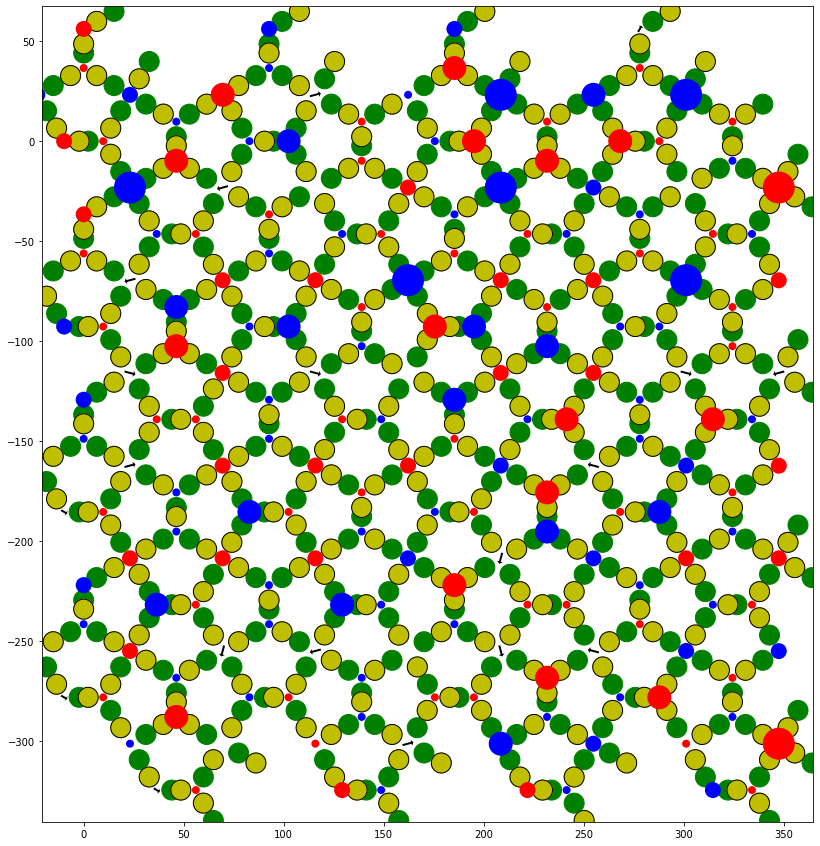

In [17]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(0)
v = v.colloids_to_vertices(col)

col.display(ax1)
v.display(ax1)
v.vertices.groupby('charge').count()

[19.3788 21.6742 19.3788 ... 19.3788 21.6742 32.1584]


,x,y,coordination,dx,dy
charge,,,,,
-3,3,3,3,3,3
-2,11,11,11,11,11
-1,69,69,69,69,69
0,48,48,48,48,48
1,43,43,43,43,43
2,16,16,16,16,16
3,5,5,5,5,5


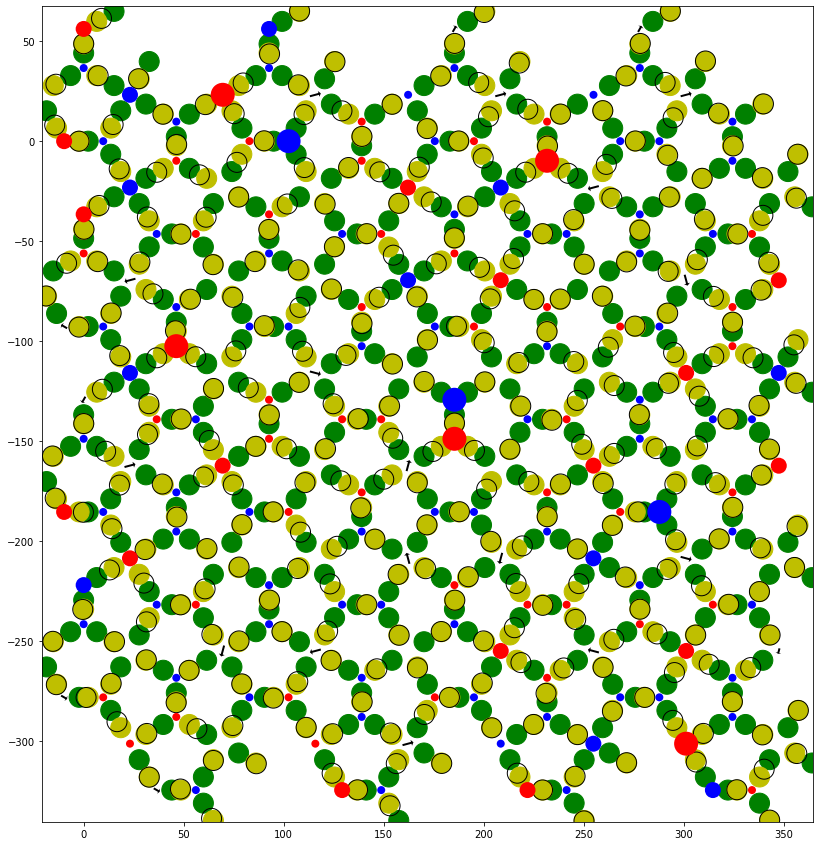

In [18]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))
v = ice.vertices()
col.set_state_from_frame(-1)
v = v.colloids_to_vertices(col)

col.display(ax1)
v.display(ax1)
v.vertices.groupby('charge').count()

# How much space do the particles explore?

In [19]:
col.trj

type           x           y    z     mux     muy  muz      t
frame id                                                                
0     1       1   -2.262900    0.000000  0.0  0.0000  0.0000  0.0    0.0
      2       1  -13.546100    6.535400  0.0  0.0000  0.0000  0.0    0.0
      3       1   -6.535400   32.805901  0.0  0.0000  0.0000  0.0    0.0
      4       1    6.535400   32.805901  0.0  0.0000  0.0000  0.0    0.0
      5       1   13.546100    6.535400  0.0  0.0000  0.0000  0.0    0.0
...         ...         ...         ...  ...     ...     ...  ...    ...
100   636     3  231.731003 -278.140015  0.0  0.0000  4.5258  0.0  100.0
      637     3  278.112000 -278.112000  0.0  4.5258  0.0000  0.0  100.0
      638     3  278.112000 -231.759995  0.0 -0.0000 -4.5258 -0.0  100.0
      639     3  324.434998 -324.492004  0.0  4.5258  0.0000  0.0  100.0
      640     3  324.434998 -278.140015  0.0 -0.0000 -4.5258 -0.0  100.0

[64640 rows x 8 columns]

In [20]:
ids = col.trj.groupby('id')

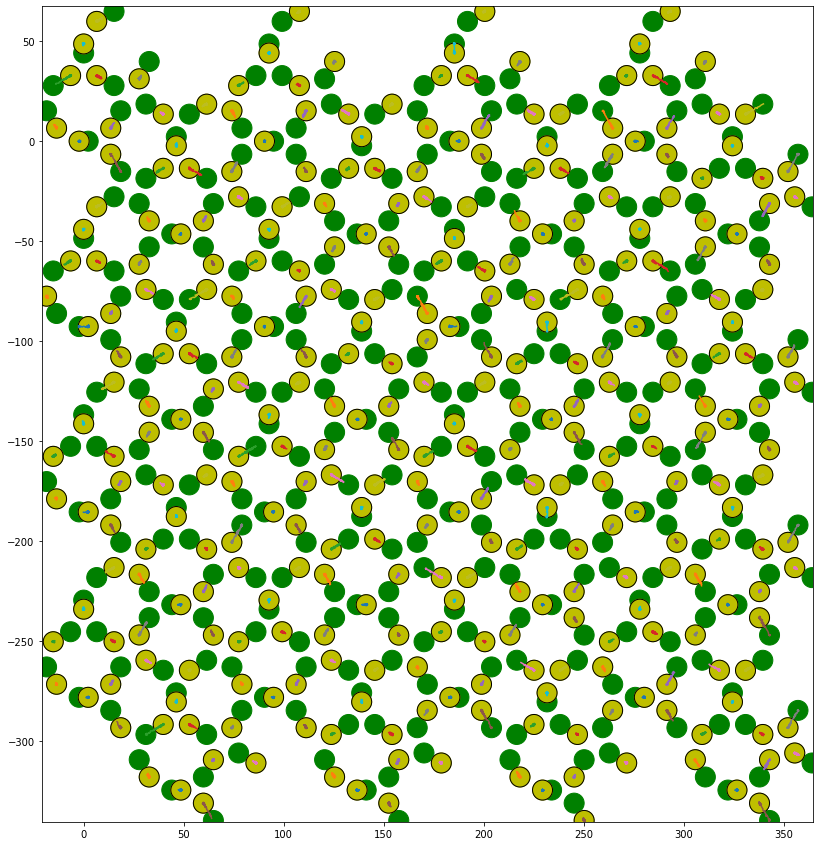

In [21]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))

col.set_state_from_frame(0)

col.display(ax1)


for i, int in ids:
    
    plt.plot(int.x, int.y)


# Is possible to compute vertices 'a posteriori' ?

In [22]:
load_obj = mgc.trj_lazyread(os.path.join(output,"ACI_CairoLattice_l10_15mT-800s.lammpstrj"), output = ["x","y","z","mux","muy","muz"])

In [23]:
bnd = load_obj.get_bounds()
trj = load_obj.read_trj()

In [24]:
trj

type           x           y    z     mux     muy  muz
frame  id                                                          
0      1        1   -2.262900    0.000000  0.0  0.0000  0.0000  0.0
       2        1  -18.546101   15.195700  0.0  0.0000  0.0000  0.0
       3        1   -6.535400   32.805901  0.0  0.0000  0.0000  0.0
       4        1    6.535400   32.805901  0.0  0.0000  0.0000  0.0
       5        1   13.546100    6.535400  0.0  0.0000  0.0000  0.0
...           ...         ...         ...  ...     ...     ...  ...
120000 3996     3  787.500000 -834.364014  0.0  0.0000  4.5258  0.0
       3997     3  833.823975 -834.335999  0.0  4.5258  0.0000  0.0
       3998     3  833.823975 -787.984009  0.0  0.0000  4.5258  0.0
       3999     3  880.146973 -880.716003  0.0 -4.5258 -0.0000 -0.0
       4000     3  880.146973 -834.364014  0.0  0.0000  4.5258  0.0

[4804000 rows x 7 columns]

In [25]:
col_trj = ice.get_ice_trj(trj,bnd, atom_types = 1, trap_types = [2,3])

In [26]:
col_trj

type           x           y    z       dx       dy   dz  \
frame  id                                                               
0      0        2  -16.046101   10.865500  0.0 -5.00000  8.66025  0.0   
       1        2  -10.865500   30.305901  0.0  8.66025  5.00000  0.0   
       2        2   10.865500   30.305901  0.0 -8.66025  5.00000  0.0   
       3        2   16.046101   10.865500  0.0 -5.00000 -8.66025 -0.0   
       4        2   16.046101  -10.865500  0.0  5.00000 -8.66025  0.0   
...           ...         ...         ...  ...      ...      ...  ...   
120000 1995     3  787.500000 -834.364014  0.0 -0.00000 -4.52580 -0.0   
       1996     3  833.823975 -834.335999  0.0  4.52580  0.00000  0.0   
       1997     3  833.823975 -787.984009  0.0  0.00000  4.52580  0.0   
       1998     3  880.146973 -880.716003  0.0  4.52580  0.00000  0.0   
       1999     3  880.146973 -834.364014  0.0 -0.00000 -4.52580 -0.0   

                   cx        cy   cz  
frame  id                             
0      0    -2.500000  4.330199  0.0  
       1     4.330101  2.500000  0.0  
       2    -4.330101  2.500000  0.0  
       3    -2.500001 -4.330101  0.0  
       4     2.500000 -4.330199  0.0  
...               ...       ...  ...  
120000 1995  0.023010 -2.200012  0.0  
       1996  2.195007  0.096008  0.0  
       1997  0.122009  1.458008  0.0  
       1998  1.268005 -0.187012  0.0  
       1999 -0.023987 -2.015991  0.0  

[2402000 rows x 10 columns]

In [27]:
frame = 120000
type2 = col_trj.loc[:].query('type == 2')
type3 = col_trj.loc[:].query('type == 3')

type2_v = type2.query('dy == 5 or dy == -5')
type2_h = type2.query('dx > 6 or dx < -6')

type3_v = type3.query('dy == 0 or dy == -0')
type3_h = type3.query('dx == 0 or dx == -0')

In [28]:
type2

type           x           y    z       dx       dy   dz  \
frame  id                                                               
0      0        2  -16.046101   10.865500  0.0 -5.00000  8.66025  0.0   
       1        2  -10.865500   30.305901  0.0  8.66025  5.00000  0.0   
       2        2   10.865500   30.305901  0.0 -8.66025  5.00000  0.0   
       3        2   16.046101   10.865500  0.0 -5.00000 -8.66025 -0.0   
       4        2   16.046101  -10.865500  0.0  5.00000 -8.66025  0.0   
...           ...         ...         ...  ...      ...      ...  ...   
120000 1595     2  896.192993 -869.851013  0.0 -5.00000 -8.66025 -0.0   
       1596     2  896.192993 -891.581970  0.0  5.00000 -8.66025  0.0   
       1597     2  915.633972 -864.669983  0.0  8.66025 -5.00000  0.0   
       1598     2  910.424988 -845.200989  0.0  5.00000  8.66025  0.0   
       1599     2  891.013000 -818.317993  0.0  8.66025  5.00000  0.0   

                   cx        cy   cz  
frame  id                             
0      0    -2.500000  4.330199  0.0  
       1     4.330101  2.500000  0.0  
       2    -4.330101  2.500000  0.0  
       3    -2.500001 -4.330101  0.0  
       4     2.500000 -4.330199  0.0  
...               ...       ...  ...  
120000 1595 -0.727966 -1.313965  0.0  
       1596  2.502014 -4.312012  0.0  
       1597  4.225037 -2.525024  0.0  
       1598  2.473022  4.317993  0.0  
       1599  4.400024  2.474976  0.0  

[1921600 rows x 10 columns]

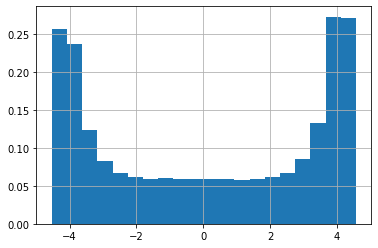

In [29]:
type2_v['cx'].hist(bins = 20, density = 1)
#type2_h['cx'].hist(bins = 20,alpha = 0.2)

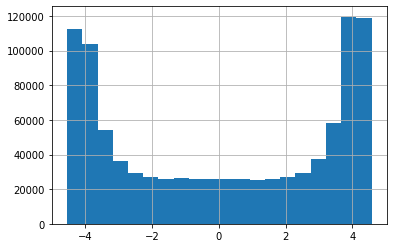

In [30]:
type2_v['cx'].hist(bins = 20)

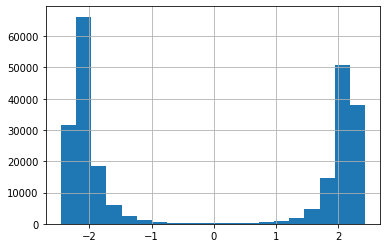

In [31]:
type3_v['cx'].hist(bins = 20)

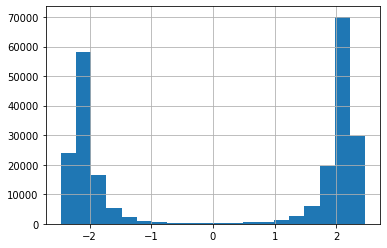

In [32]:
type3_h['cy'].hist(bins = 20)

[20.1538 92.7037 20.0987 ... 19.379  21.703  32.1951]


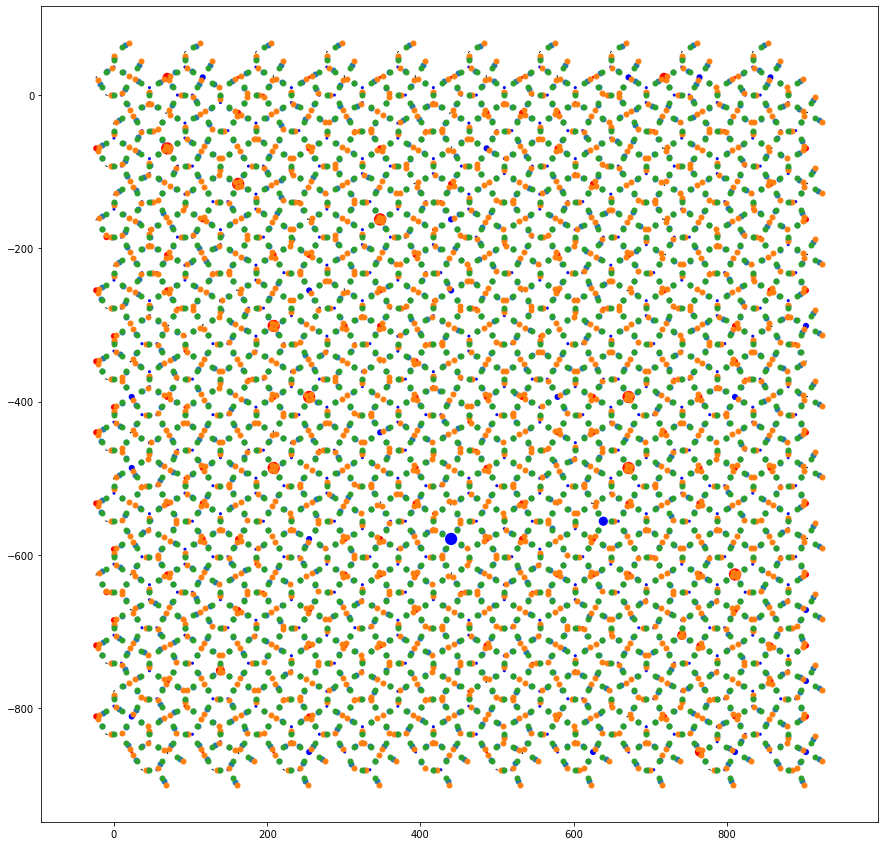

In [33]:
f, (ax1) = plt.subplots(1,1,figsize = (15,15))

v = ice.vertices()
#v.trj_to_vertices(col_trj.loc[frames[::1]]) # Analog to v.trj_to_vertices(col_trj)
v.trj_to_vertices(col_trj.loc[120000])

plt.plot(col_trj.loc[120000].x+col_trj.loc[120000].cx,
         col_trj.loc[120000].y+col_trj.loc[120000].cy, 'o', markersize = 5)

plt.plot(col_trj.loc[120000].x+col_trj.loc[120000].dx,
         col_trj.loc[120000].y+col_trj.loc[120000].dy, '.', markersize = 10)

plt.plot(col_trj.loc[120000].x, col_trj.loc[120000].y, '.', markersize = 10)
plt.axis('equal')
v.display(ax1)

In [34]:
## Infer Vertices
frames = col_trj.index.get_level_values("frame").unique()

v = ice.vertices()
v.trj_to_vertices(col_trj.loc[frames[::10]])

[20.1538 92.7037 20.0987 ... 19.379  21.703  32.1951]


In [35]:
v.vertices.loc[80000].query('charge == -4')

,x,y,coordination,charge,dx,dy


# Issues

    
    - 1. ice.get_ice_trj() function is not working properly. It only works for one type of particles and traps.
        (Solution: Allow to have more than one type of trap. Modified function in support.py file)
        
<font color='red'> SOLVED! </font>
        
    - 2. trj_to_vertices() function is not working properly. It cannot reproduce the vertex dataframe obtained with the col object.
        (Solution: The directions are not well defined. The pairs trap-particle are not correct!)
    
<font color='red'> @aortiza SOLVED the problem in commit 983bfff the trjayectory.py file was sostituted by the one of the commit</font>